In [2]:
import ctypes
import os
import numpy as np

import plotly
#import plotly.plotly as py
import plotly.graph_objs as go
#from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#from plotly.graph_objs import *
#init_notebook_mode()
init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
import scipy.integrate as integrate

simulator = ctypes.CDLL(os.path.abspath('ori.so'))
simulator.cell_parameters.restype = ctypes.c_int

In [56]:
##### the probability density function of the age distribution of an exponentially growing population of cells ####

In [57]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [58]:
###### user defined scipy PDF of the age PDF ####
import scipy.stats as st

class ageDist_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 2.0*np.log(2.0)*np.exp(-x*np.log(2))  # Normalized over its range, in this case [0,1]

my_cv = ageDist_pdf(a=0, b=1, name='ageDist_pdf')

In [71]:
my_cv.mean() # this is the mean value of the WE ASSUME THAT THE MEAN APPLIES

0.44269504088896355

In [72]:
my_cv.median()

0.41503749927884465

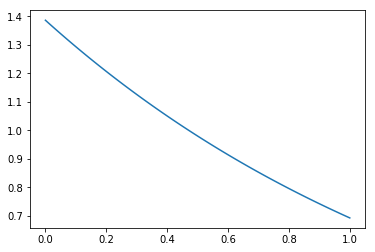

In [6]:
plt.plot(np.arange(0.0,1.01,0.01), [ageDistFunc(i) for i in np.arange(0.0,1.01,0.01)])

In [59]:
x = list(np.arange(0.0,1.01,0.01))
x.append(1.0)
x.insert(0, 0.0)
y = [ageDistFunc(i) for i in np.arange(0.0,1.01,0.01)]
y.append(0.0)
y.insert(0, 0.0)
trace = go.Scatter(
    name='Measurement',
    x=x,
    y=y,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tozerox'
)

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Cell Age', zeroline=False, range=[-0.1, 1.1]),
    yaxis=dict(title='Probability Density', zeroline=True),
    title='Population Exponentially Growing Age Distribution',
    showlegend = False,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [24]:
plotly.io.write_image(fig, 'age_distribution.png' , width=1200, height=800)

In [ ]:
##### the probability of the age distribution of an exponentially growing population ####

In [28]:
I = integrate.quad(ageDistFunc, 0.1, 0.2)

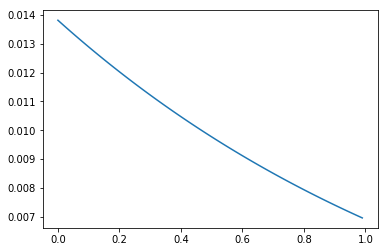

In [39]:
x = np.arange(0.0,1.0,0.01)
y = [integrate.quad(ageDistFunc, i, i+0.01)[0] for i in x]
plt.plot(x, y)

In [40]:
sum(y)

1.0000000000000002

In [ ]:
####### cell cycle parameter #######

In [13]:
age_weight = {}
for i in np.arange(0.0,1.01,0.01):
    age_weight[i] = ageDistFunc(i)

In [4]:
tau = 60.0
C = 40.0
D = 20.0
distRes = {}
for i in [i for i in np.arange(0.0,1.01,0.01)]:
    results = (ctypes.c_double*6)()
    status = simulator.cell_parameters(ctypes.c_double(tau), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
    results = [i for i in results]
    distRes[i] = {}
    distRes[i]['volume'] = results[0]
    distRes[i]['G0'] = results[1]
    distRes[i]['Ga'] = results[2]
    distRes[i]['segregation_timer'] = results[3]
    distRes[i]['oriC'] = results[4]
    distRes[i]['terC'] = results[5]
    results = None

In [5]:
distRes

{0.0: {'volume': 1.0,
  'G0': 1.0,
  'Ga': 1.0,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.01: {'volume': 1.0069555500567189,
  'G0': 1.0,
  'Ga': 1.015,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.02: {'volume': 1.013959479790029,
  'G0': 1.0,
  'Ga': 1.03,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.03: {'volume': 1.0210121257071934,
  'G0': 1.0,
  'Ga': 1.045,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.04: {'volume': 1.0281138266560665,
  'G0': 1.0,
  'Ga': 1.06,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.05: {'volume': 1.0352649238413776,
  'G0': 1.0,
  'Ga': 1.075,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.06: {'volume': 1.0424657608411214,
  'G0': 1.0,
  'Ga': 1.09,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.07: {'volume': 1.0497166836230674,
  'G0': 1.0,
  'Ga': 1.105,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.08: {'volume': 1.05

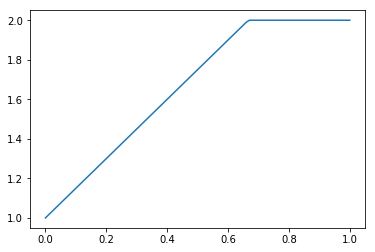

In [6]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['Ga'] for i in sorted([i for i in distRes])])

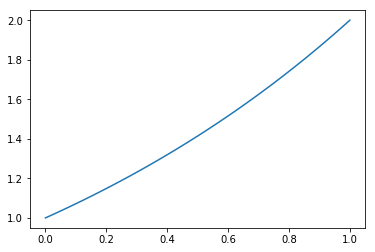

In [7]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['volume'] for i in sorted([i for i in distRes])])

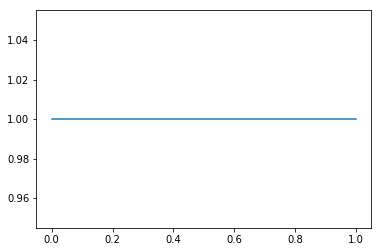

In [8]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['G0'] for i in sorted([i for i in distRes])])

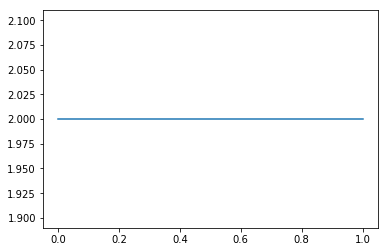

In [9]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['oriC'] for i in sorted([i for i in distRes])])

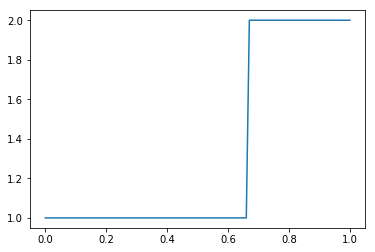

In [10]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['terC'] for i in sorted([i for i in distRes])])

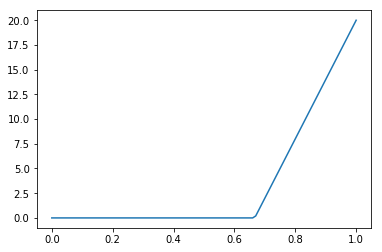

In [11]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['segregation_timer'] for i in sorted([i for i in distRes])])

In [41]:
##### Volkmer et al. ####
def gr_cellConc(gr_h):
    #cell_volume --> fL
    cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    population_cell_concentration = (3.6*10.0**9.0)/cell_volume
    return population_cell_concentration

In [43]:
gr_cellConc(0.5)

1337047353.7604458

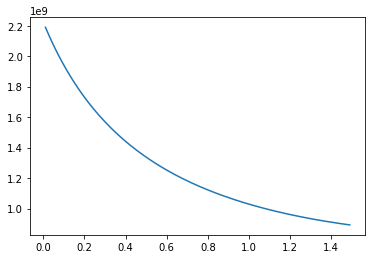

In [48]:
plt.plot([i for i in np.arange(0.01, 1.5, 0.01)], [gr_cellConc(i) for i in np.arange(0.01, 1.5, 0.01)])

In [47]:
###### calculate the real volume distribution of a population of cells #####
#Note to change between hourly and min growth rate --> a = b/np.log(2)

In [88]:
#total cell volume = 3.6 uL*OD-1*mL-1

gr_h = 0.5
C = 40.0
D = 20.0

#1) calculate the average cell age
mean_cell_age = 0.44269504088896355
#2) calculate the (measured) mean cell volume
measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
#3) calculate 
results = (ctypes.c_double*6)()
status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
results = [i for i in results]
theoretical_cell_volume = results[0]
theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume

In [90]:
for i in distRes:
    distRes[i]['physical_volume'] = theoretical_cell_volume_adjustment*distRes[i]['volume']

In [91]:
distRes

{0.0: {'volume': 1.0,
  'G0': 1.0,
  'Ga': 1.0,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4161271188800432},
 0.01: {'volume': 1.0069555500567189,
  'G0': 1.0,
  'Ga': 1.015,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.41902151188537157},
 0.02: {'volume': 1.013959479790029,
  'G0': 1.0,
  'Ga': 1.03,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.42193603698613225},
 0.03: {'volume': 1.0210121257071934,
  'G0': 1.0,
  'Ga': 1.045,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4248708342121229},
 0.04: {'volume': 1.0281138266560665,
  'G0': 1.0,
  'Ga': 1.06,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.42782604456712514},
 0.05: {'volume': 1.0352649238413776,
  'G0': 1.0,
  'Ga': 1.075,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4308018100356798},
 0.06: {'volume': 1.04

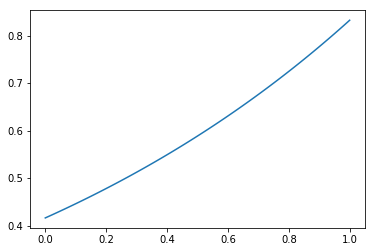

In [92]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['physical_volume'] for i in sorted([i for i in distRes])])

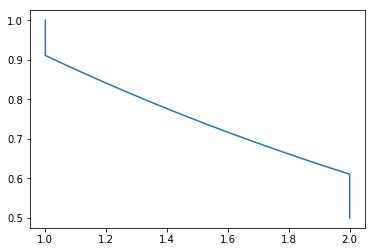

In [180]:
#plt.plot(Ga, [(i/max(weights))*100.0 for i in weights])
plt.plot(Ga, [i/max(weights) for i in weights])

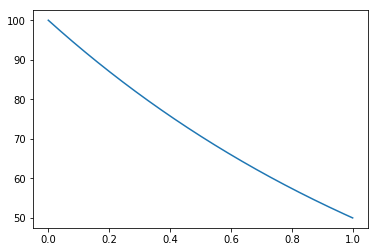

In [250]:
plt.plot(age_array, [(i/max(weights))*100.0 for i in weights])

In [ ]:
#### need to plot the histogram of cell number distributions ####

In [60]:
##### trying to use the mean population adjusted cell volume to calculate cell count
gr_h = 0.6931471805599453
C = 40.0
D = 20.0
def popCellCount_meanPop(gr_h, C=40.0, D=20.0):
    #1) calculate the average cell age
    mean_cell_age = 0.44269504088896355
    #2) calculate the (measured) mean cell volume
    measured_mean_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    print('################ GR '+str(gr_h)+' ########## ('+str((np.log(2)/gr_h)*60.0)+') #####')
    print('Measured mean cell volume: '+str(measured_mean_cell_volume))
    #3) calculate 
    #results = (ctypes.c_double*6)()
    #status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #results = [i for i in results]
    #theoretical_cell_volume = results[0]
    #print('Theoretical Cell Volume: '+str(theoretical_cell_volume))
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #print('Cell Volume Adjustment: '+str(theoretical_cell_volume_adjustment))
    #### adjust for the different 
    age_array = np.arange(0.0, 1.0, 0.0001)
    weights = []
    for i in age_array:
        weights.append(integrate.quad(ageDistFunc, i, i+0.0001)[0])
    #### calculate the physical volume ###
    theoretical_cell_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        theoretical_cell_volume.append(results[0])
        Ga.append(results[2])

    print('Theoretical mean cell volume: '+str(np.mean(theoretical_cell_volume)))
    if measured_mean_cell_volume>=np.mean(theoretical_cell_volume):
        theoretical_cell_volume_adjustment = measured_mean_cell_volume/np.mean(theoretical_cell_volume)
    elif np.mean(theoretical_cell_volume)>measured_mean_cell_volume:
        theoretical_cell_volume_adjustment = measured_mean_cell_volume*np.mean(theoretical_cell_volume)
    print('Cell volume adjustment: '+str(theoretical_cell_volume_adjustment))   

    physical_cell_volume = [i*theoretical_cell_volume_adjustment for i in theoretical_cell_volume]

    print('Physical mean cell volume: '+str(np.mean(physical_cell_volume)))

    #cell_concentration --> mL**-1 * OD**-1
    #population_cell_concentration = (3.6*10.0**9.0)/measured_mean_cell_volume
    population_cell_concentration = (3.6*10.0**9.0)/np.mean(physical_cell_volume)
    print('Old: 8 * 10^8 * mL-1 * OD-1 ')
    print('New: '+str(population_cell_concentration/10.0**8.0)+' * 10^8 * mL-1 * OD-1')
    return population_cell_concentration

################ GR 0.1 ########## (415.8883083359671) #####
Measured mean cell volume: 1.8557000000000001
Theoretical mean cell volume: 0.7971846724674538
Cell volume adjustment: 2.327816958969142
Physical mean cell volume: 1.8557
Old: 8 * 10^8 * mL-1 * OD-1 
New: 19.39968744947998 * 10^8 * mL-1 * OD-1
################ GR 0.30000000000000004 ########## (138.62943611198904) #####
Measured mean cell volume: 2.2953
Theoretical mean cell volume: 0.9736835577147598
Cell volume adjustment: 2.357336715623586
Physical mean cell volume: 2.2953
Old: 8 * 10^8 * mL-1 * OD-1 
New: 15.684224284407264 * 10^8 * mL-1 * OD-1
################ GR 0.5000000000000001 ########## (83.17766166719342) #####
Measured mean cell volume: 2.6925000000000003
Theoretical mean cell volume: 1.1892597829680147
Cell volume adjustment: 2.2640133287618416
Physical mean cell volume: 2.6925
Old: 8 * 10^8 * mL-1 * OD-1 
New: 13.370473537604457 * 10^8 * mL-1 * OD-1
################ GR 0.7000000000000001 ########## (59.41261547

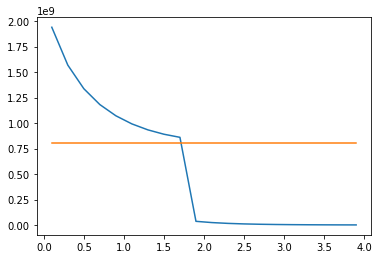

In [324]:
ageRange = np.arange(0.1, 4.0, 0.2)
plt.plot(ageRange, [popCellCount_meanPop(i) for i in ageRange])
plt.plot(ageRange, [8.0*10.0**8.0]*len(ageRange)) 

In [316]:
gr_h = 0.6931471805599453
popCellCount_meanPop(gr_h)

################ GR 0.6931471805599453 ########## (60.0) #####
Measured mean cell volume: 3.0358446077728214
Theoretical mean cell volume: 1.4426450414665861
Cell volume adjustment: 2.104360061215471
Physical mean cell volume: 3.035844607772821
Old: 8 * 10^8 * mL-1 * OD-1 
New: 11.858314456486818 * 10^8 * mL-1 * OD-1


1185831445.6486819

In [295]:
gr_h = 0.6931471805599453
print('GR hour: '+str(gr_h))
print('GR minutes: ')
print('Doubling time hours: '+str(np.log(2)/gr_h))
print('Doubling time minutes: '+str((np.log(2)/gr_h)*60.0))

GR hour: 0.6931471805599453
GR minutes: 
Doubling time hours: 1.0
Doubling time minutes: 60.0


In [61]:
def ch_volume(doubling_time_min, cell_age, C=40.0, D=20.0):
    return 2.0**((C+D+(cell_age*doubling_time_min))/doubling_time_min)-1.0

In [62]:
def popCellCount(gr_h, C=40.0, D=20.0):
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = 2.2
    #C = 40.0
    #D = 20.0
    #1) calculate the average cell age
    mean_cell_age = 0.44269504088896355
    #Volkmer cell concentration
    #2) calculate the (measured) mean cell volume
    measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #3) calculate 
    results = (ctypes.c_double*6)()
    status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #status = simulator.cell_parameters(ctypes.c_double(divRate_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    results = [i for i in results]
    theoretical_cell_volume = results[0]
    theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #### adjust for the different age 
    age_array = np.arange(0.0, 1.0, 0.0001)
    weights = []
    for i in age_array:
        weights.append(integrate.quad(ageDistFunc, i, i+0.0001)[0])
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        physical_volume.append(theoretical_cell_volume_adjustment*results[0])
        Ga.append(results[2])

    #cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    #change this to use the median or mean of the theoretical cell distribution (see if they are close)
    # and the std deviation 
    population_cell_concentration = (3.6*10.0**9.0)/measured_cell_volume 
    #print('Old: 8.0 * 10^8 * mL-1 * OD-1 ')
    #print('New: {0:.2f} * 10^8 * mL-1 * OD-1'.format(population_cell_concentration/10**8))
    return population_cell_concentration

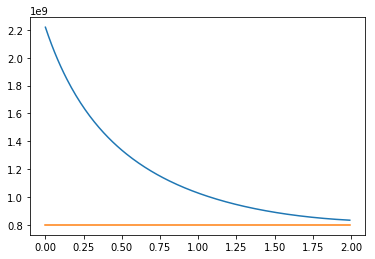

In [64]:
ageRange = np.arange(0.001, 2.0, 0.01)
plt.plot(ageRange, [popCellCount(i) for i in ageRange])
plt.plot(ageRange, [8.0*10.0**8.0]*len(ageRange)) 

In [65]:
trace = go.Scatter(
    name='Measurement',
    x=ageRange,
    y=[popCellCount(i) for i in ageRange],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'))

trace1 = go.Scatter(
    name='Measurement',
    x=ageRange,
    y=[8.0*10.0**8.0]*len(ageRange),
    mode='lines',
    line=dict(color='rgb(236, 171, 20)'))


# Trace order can be important
# with continuous error bars
data = [trace, trace1]

layout = go.Layout(
    xaxis=dict(title='Growth Rate (h<sup>-1</sup>)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Adjusted Theoretical Growth Rate Dependent Cell Concentration',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [9]:
plotly.io.write_image(fig, 'meanCellAge_cell_concentration.png' , width=1200, height=800)

In [ ]:
###### Fit data from thesis ####
#C = 44.98*(1.0+(5.206*np.exp(-4.917/tau_h)))
D = 62.8298142*np.exp(-213.585678*x)+25.5633968
C = 235.796165*np.exp(-428.916673*x)+45.2188479

In [28]:
results = (ctypes.c_double*6)()
status = simulator.cell_parameters(ctypes.c_double(60.0), ctypes.c_double(40.0), ctypes.c_double(20.0), ctypes.c_double(0.44269504088896355), results)
results = [i for i in results]
results[0]

1.3591409142295228

In [ ]:
######## Try with my own C and D values

In [78]:
def popCellCount(dt_min, age_array, weights, real_cell_volume=2.5873453927627095):
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = 2.2
    #C = 40.0
    #D = 20.0
    ##### gr_h ######
    #gr_h = gr_h
    #dt_min = gr_h*60.0
    #gr_min = np.log(2.0)/dt_min
    #dt_h = np.log(2.0)/gr_h
    ##### dt_min ####
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    ##### gr_min #####
    #dt_min = np.log(2.0)/gr_min
    #gr_min = gr_min
    #dt_h = dt_min/60.0
    #gr_h = np.log(2)/dt_h   
    ###################
    #print('Doubling Time: '+str(dt_min)+' minutes')
    #print('Growth Rate: '+str(gr_min)+' * min-1')
    #print('Doubling Time: '+str(dt_h)+' hours')
    #print('Growth Rate: '+str(gr_h)+' * h-1')
    D = 62.8298142*np.exp(-213.585678*gr_min)+25.5633968
    C = 235.796165*np.exp(-428.916673*gr_min)+45.2188479
    #print('C: '+str(C)+' min')
    #print('D: '+str(D)+' min')
    #1) calculate the average cell age
    #mean_cell_age = 0.44269504088896355
    #real_cell_volume = 3.0358446077728214 #when theoretical is 1.0 C=40.0, D=20.0
    #real_cell_volume = 2.8530831045899547 #when theoretical is 1.0 and tau==C_fit+D_fit
    #real_cell_volume = 2.85305343302496
    #Volkmer cell concentration
    #2) calculate the (measured) mean cell volume
    #measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #3) calculate 
    #results = (ctypes.c_double*6)()
    #status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    ###status = simulator.cell_parameters(ctypes.c_double(divRate_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #results = [i for i in results]
    #theoretical_cell_volume = results[0]
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #### adjust for the different age 
    #age_array = np.arange(0.0, 1.0, 0.001)
    #weights = {}
    #for i in age_array:
    #    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    #for i in age_array:
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        for y in range(int(weights[i]*100000.0)):
            physical_volume.append(results[0]*real_cell_volume)
            Ga.append(results[2])
    #cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    #change this to use the median or mean of the theoretical cell distribution (see if they are close)
    # and the std deviation 
    #population_cell_concentration = (3.6*10.0**9.0)/measured_cell_volume 
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #print('Old: 8.0 * 10^8 * mL-1 * OD-1 ')
    #print('New: {0:.2f} * 10^8 * mL-1 * OD-1'.format(population_cell_concentration/10**8))
    #print('##################################')
    return {'cell_concentration': (3.6*10.0**9.0)/np.mean(physical_volume),
            'std_cell_concentration': np.std([(3.6*10.0**9.0)/i for i in physical_volume]),
            'mean_physical_volume': np.mean(physical_volume),
            'std_physical_volume': np.std(physical_volume),
            'mean_Ga': np.mean(Ga),
            'std_Ga': np.std(Ga)}

In [ ]:
#################################################################################
############################ Find the real volume when theo volume is 1.0  ######
#################################################################################

In [ ]:
### minimise this function to find when the functional for of C+D==tau

In [242]:
from scipy import optimize
def f(x):
    if x<=0.0:
        return 9999.0
    else:
        d1 = 62.8298142*np.exp(-213.585678*(np.log(2)/x))+25.5633968
        c1 = 235.796165*np.exp(-428.916673*(np.log(2)/x))+45.2188479
        #d1 = 62.8298142*np.exp(-213.585678*x)+25.5633968
        #c1 = 235.796165*np.exp(-428.916673*x)+45.2188479
        #print(x)
        #print(np.abs((np.log(2)/x)-(c1+d1)))
        #print('#################')
        return np.abs(np.log(2)/x-(c1+d1))

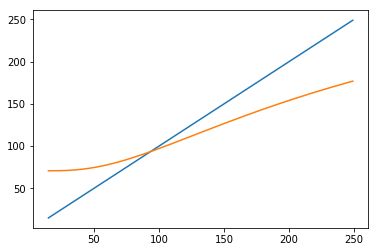

In [32]:
t = np.arange(15.0, 250.0, 1.0)
plt.plot(t, t)
plt.plot(t, [62.8298142*np.exp(-213.585678*np.log(2)/i)+25.5633968+235.796165*np.exp(-428.916673*np.log(2)/i)+45.2188479 for i in t])

In [30]:
result = optimize.minimize(f, np.array([10.0]), method = 'Nelder-Mead')

In [31]:
result

 final_simplex: (array([[0.00741535],
       [0.00741538]]), array([6.38736395e-05, 1.04464984e-04]))
           fun: 6.387363949045266e-05
       message: 'Optimization terminated successfully.'
          nfev: 78
           nit: 39
        status: 0
       success: True
             x: array([0.00741535])

In [34]:
#### Results are:
gr_min = float(result['x'][0])

In [72]:
#calculate when 
dt_min = np.log(2)/gr_min
dt_h = dt_min/60.0
gr_h = np.log(2)/dt_h
print(gr_h)
#original Volkmer et al.
#measured_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
#fit data from Volkmer et al.
measured_volume = -0.38951254*gr_h**2.0 + 1.95139596*gr_h + 2.26378015
print('Minimization (when C+D==tau) returned a doubling time of: '+str(dt_min))
print('Measured volume when C+D==tau: '+str(measured_volume))

0.4449212551116943
Minimization (when C+D==tau) returned a doubling time of: 93.47458759450846
Measured volume when C+D==tau: 3.054891764782413


In [ ]:
######################## weights and age_dist ###################

In [67]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [68]:
age_array = np.arange(0.0, 1.0, 0.001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]

In [ ]:
#######################################################################
########################## plot the cell concentration dt_min #########
#######################################################################

In [ ]:
plt.plot(dt_min, [i['cell_concentration'] for i in results])
plt.plot(dt_min, [8.0*10.0**8.0]*len(dt_min))
plt.xlabel('Doubling Time (min)')
plt.ylabel('Cell Number * 10^8 * mL-1 * OD-1')

In [79]:
dt_min = np.arange(18.0, 250.0, 5.0)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

'''
trace1 = go.Scatter(
    name='Old Measurement',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='rgb(242, 174, 15)'))
'''

trace1 = go.Scatter(
    name='Old Measurement',
    x=[58.0516142],
    y=[popCellCount(58.0516142, age_array, weights)['cell_concentration']],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace1]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=72,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="(58.05, 0.8x10<sup>9</sup>)",
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)



iplot(fig, filename='pandas-continuous-error-bars')

In [67]:
plotly.io.write_image(fig,'dt_min_cell_conc_alt.png' , width=1200, height=800)

Text(0, 0.5, 'Cell Number * 10^8 * mL-1 * OD-1')

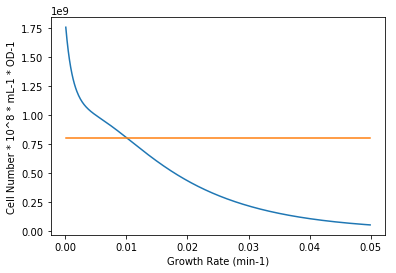

In [198]:
gr_min = np.arange(0.0001, 0.05, 0.0001)
plt.plot(gr_min, [popCellCount(i, age_array, weights) for i in gr_min])
plt.plot(gr_min, [8.0*10.0**8.0]*len(gr_min)) 
plt.xlabel('Growth Rate (min-1)')
plt.ylabel('Cell Number * 10^8 * mL-1 * OD-1')

In [70]:
dt_min = np.arange(0.0001, 0.03, 0.0001)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

'''
trace1 = go.Scatter(
    name='Old Measurement',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='rgb(242, 174, 15)'))
'''

trace1 = go.Scatter(
    name='Old Measurement',
    x=[np.log(2)/58.0516142],
    y=[popCellCount(np.log(2)/58.0516142, age_array, weights)['cell_concentration']],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace1]

layout = go.Layout(
    xaxis=dict(title='Growth Rate (min<sup>-1</sup>)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=np.log(2)/72,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="({0:.4f}, 0.8x10<sup>9</sup>)".format(np.log(2)/58.05),
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)



iplot(fig, filename='pandas-continuous-error-bars')

In [74]:
plotly.io.write_image(fig,'gr_min_cell_conc_alt.png' , width=1200, height=800)

In [6]:
###########################################################################################
######### Optimise to estimate the GR when the authors measured 8.0*10**8 cells per mL ####
###########################################################################################

In [71]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [72]:
age_array = np.arange(0.0, 1.0, 0.001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]

In [73]:
from scipy import optimize
def f(x):
    if x<=0.0:
        return 9999.0
    else:
        res = popCellCount(x, age_array, weights)
        return np.abs((8.0*10.0**8.0)-(res['cell_concentration']))

In [12]:
result = optimize.minimize(f, np.array([60.0]), method = 'Nelder-Mead')

In [13]:
result

 final_simplex: (array([[58.0516142],
       [58.0516142]]), array([0.00015819, 0.00025356]))
           fun: 0.00015819072723388672
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 38
        status: 0
       success: True
             x: array([58.0516142])

In [ ]:
###########################################################
############ DNA growth rate distribution #################
###########################################################

In [74]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [75]:
age_array = np.arange(0.0, 1.0, 0.0001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.0001)[0]

In [1]:
def popCellCount(dt_min, age_array, weights, real_cell_volume=2.5873453927627095):
    ##### dt_min ####
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    ##### gr_min #####
    #dt_min = np.log(2.0)/gr_min
    #gr_min = gr_min
    #dt_h = dt_min/60.0
    #gr_h = np.log(2)/dt_h   
    #D = 62.8298142*np.exp(-213.585678*gr_min)+25.5633968
    #C = 235.796165*np.exp(-428.916673*gr_min)+45.2188479
    C =250.02*np.exp(-304.41*gr_min)+60.97
    D = 100.59*np.exp(-137.07*gr_min)+19.93
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        for y in range(int(weights[i]*100000.0)):
            physical_volume.append(results[0]*real_cell_volume)
            Ga.append(results[2])
    return {'cell_concentration': (3.6*10.0**9.0)/np.mean(physical_volume),
            'std_cell_concentration': np.std([(3.6*10.0**9.0)/i for i in physical_volume]),
            'mean_physical_volume': np.mean(physical_volume),
            'std_physical_volume': np.std(physical_volume),
            #'physical_volume': physical_volume,
            'mean_Ga': np.mean(Ga),
            'std_Ga': np.std(Ga)}
            #'Ga': Ga}

In [17]:
dt_min = np.arange(18.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['mean_Ga']+i['std_Ga'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=[i['mean_Ga'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['mean_Ga']-i['std_Ga'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='DNA Content (Chromosome Equivalent)'),
    title='Growth Rate Dependent DNA Content',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='pandas-continuous-error-bars')

In [14]:
plotly.io.write_image(fig,'gr_min_dna.png' , width=1200, height=800)

In [24]:
###################################################################
######### Volkmer et al. growth rate dependent cell volume ########
###################################################################

In [19]:
def measured_cell_volume(dt_min):
    dt_min = dt_min
    #gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    return -0.53*gr_h**2.0 + 2.41*gr_h + 1.62

In [23]:
dt_min = np.arange(22.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(measured_cell_volume(i)) 
    
trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'))

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Volume (fL)'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='pandas-continuous-error-bars')

In [25]:
plotly.io.write_image(fig,'volkmer_cell_volume.png' , width=1200, height=800)

In [26]:
#######################################################################################################
################ use only Volkmer et al. to calculate growth rate dependent cell concentration ########
#######################################################################################################

In [ ]:
################ minutes ###############

In [52]:
def onlyVolkmer(dt_min):
    dt_min = dt_min
    #gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    return (3.6*10.0**9.0)/(-0.53*gr_h**2.0 + 2.41*gr_h + 1.62)

In [53]:
dt_min = np.arange(22.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(onlyVolkmer(i)) 
    
trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'))

trace1 = go.Scatter(
    name='Old Measurement',
    x=[58.0516142],
    y=[onlyVolkmer(58.0516142)],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

# Trace order can be important
# with continuous error bars
data = [trace, trace1]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration ', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=78,
            y=onlyVolkmer(58.0516142),
            xref="x",
            yref="y",
            text="({0:.4f}, 0.8x10<sup>9</sup>)".format(58.0516142),
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)

iplot(fig, filename='pandas-continuous-error-bars')

In [54]:
plotly.io.write_image(fig,'volkmer_cell_concentration_dt_min.png' , width=1200, height=800)

In [43]:
############### hours ########## 

In [82]:
def onlyVolkmer(dt_min):
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    return (3.6*10.0**9.0)/(-0.53*gr_h**2.0 + 2.41*gr_h + 1.62)

In [47]:
dt_min = np.arange(0.0001, 0.03, 0.0001)
results = []
for i in dt_min:
    results.append(onlyVolkmer(i)) 
    
trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'))

trace1 = go.Scatter(
    name='Old Measurement',
    x=[np.log(2)/58.0516142],
    y=[onlyVolkmer(np.log(2)/58.0516142)],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

# Trace order can be important
# with continuous error bars
data = [trace, trace1]

layout = go.Layout(
    xaxis=dict(title='Growth Rate (min<sup>-1</sup>)'),
    yaxis=dict(title='Cell Concentration ', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=np.log(2)/78,
            y=onlyVolkmer(np.log(2)/58.0516142),
            xref="x",
            yref="y",
            text="({0:.4f}, 0.8x10<sup>9</sup>)".format(np.log(2)/58.0516142),
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)

iplot(fig, filename='pandas-continuous-error-bars')

In [49]:
plotly.io.write_image(fig,'volkmer_cell_concentration_gr_min.png' , width=1200, height=800)

In [77]:
########################################################
############# both Volkmer et al. and our method #######
########################################################

In [2]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [3]:
age_array = np.arange(0.0, 1.0, 0.0001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.0001)[0]

In [4]:
def onlyVolkmer(dt_min):
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    return (3.6*10.0**9.0)/(-0.53*gr_h**2.0 + 2.41*gr_h + 1.62)

In [55]:
dt_min = np.arange(20.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(onlyVolkmer(i)) 
    
trace = go.Scatter(
    name='Volkmer et al.',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='#2ca02c',
             dash='dash'
            )
)

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration ', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)

#fig = go.Figure(data=data, layout=layout)


#dt_min = np.arange(18.0, 250.0, 5.0)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty',
    showlegend=False
)

trace = go.Scatter(
    name='Cooper and Helmstetter',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

"""
trace1 = go.Scatter(
    name='Fixed Cell Concentration',
    x=[58.0516142],
    y=[popCellCount(58.0516142, age_array, weights)['cell_concentration']],
    marker=dict(size=10, 
                color='rgb(0,0,0)',
                symbol=4,
                sizemin=1),
    showlegend=False
)
"""

trace2 = go.Scatter(
    name='Fixed Cell Concentration',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='#d62728',
             dash='dash'
            )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines',
    showlegend=False
)

# Trace order can be important
# with continuous error bars
data.append(lower_bound)
data.append(trace)
data.append(upper_bound)
#data.append(trace1)
data.append(trace2)

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = True,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """

"""
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=78,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="(58.05, 0.8x10<sup>9</sup>)",
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)
"""

fig.update_layout(
    legend=go.layout.Legend(
        x=0.015,
        y=0.95
    )
)

iplot(fig, filename='pandas-continuous-error-bars')

In [10]:
plotly.io.write_image(fig, 'volkmer_CH_dt_min.png', width=1000, height=600)

In [123]:
#####################################################
######## 3D subplot with the three OD cell count ####
#####################################################

In [136]:
import pandas as pd

#dt_min = np.arange(0.0001, 0.03, 0.001)
dt_min = np.arange(10.0, 250.0, 10.0)
od = np.arange(0.1, 1.5, 0.1)
z = []
for gr in dt_min:
    x = []
    for o in od:
        x.append(o*popCellCount(gr, age_array, weights)['cell_concentration'])
    z.append(x)
        
fig = go.Figure(data=[go.Surface(z=z, x=dt_min, y=od)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [7]:
############################################################################
############# All methods with Volkmer et al. measured concentration #######
############################################################################

In [3]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [4]:
age_array = np.arange(0.0, 1.0, 0.0001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.0001)[0]

In [5]:
def onlyVolkmer(dt_min):
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    return (3.6*10.0**9.0)/(-0.53*gr_h**2.0 + 2.41*gr_h + 1.62)

In [304]:
# another volume 2.5873453927627095 0.8856014853459089   2.5873441154965957 
def popCellCount(dt_min, age_array, weights, real_cell_volume=2.5403749837250897):
    ##### dt_min ####
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    ##### gr_min #####
    #dt_min = np.log(2.0)/gr_min
    #gr_min = gr_min
    #dt_h = dt_min/60.0
    #gr_h = np.log(2)/dt_h   
    D = 62.8298142*np.exp(-213.585678*gr_min)+25.5633968
    C = 235.796165*np.exp(-428.916673*gr_min)+45.2188479
    #C = 250.02*np.exp(-304.41*gr_min)+60.97
    #D = 100.59*np.exp(-137.07*gr_min)+19.93
    #C = 40.0
    #D = 20.0
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        for y in range(int(weights[i]*100000.0)):
            physical_volume.append(results[0]*real_cell_volume)
            Ga.append(results[2])
    return {'cell_concentration': (3.6*10.0**9.0)/np.mean(physical_volume),
            'std_cell_concentration': np.std([(3.6*10.0**9.0)/i for i in physical_volume]),
            'mean_physical_volume': np.mean(physical_volume),
            'std_physical_volume': np.std(physical_volume),
            #'physical_volume': physical_volume,
            'mean_Ga': np.mean(Ga),
            'std_Ga': np.std(Ga)}
            #'Ga': Ga}

In [306]:
dt_min = np.arange(20.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(onlyVolkmer(i)) 
    
trace = go.Scatter(
    name='Volkmer et al.',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='#2ca02c',
             dash='dash'
            )
)

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration ', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)


results = []
for i in dt_min:
    #results.append(popCellCount(i, age_array, weights)) 
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty',
    showlegend=False
)

trace = go.Scatter(
    name='Cooper and Helmstetter',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')


trace2 = go.Scatter(
    name='Fixed Cell Concentration',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='#d62728',
             dash='dash'
            )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines',
    showlegend=False
)

# Trace order can be important
# with continuous error bars
data.append(lower_bound)
data.append(trace)
data.append(upper_bound)
#data.append(trace1)
data.append(trace2)

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = True,
    template='plotly_white'
)

"""
gr_h = [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.6, 0.67, 0.39, 0.47, 0.4, 0.49, 0.55, 0.65, 0.5, 0.65, 0.5, 0.35, 0.2, 0.12, 0.0, 0.0]
gr_h_std = [0.05, 0.04, 0.05, 0.07, 0.04, 0.02, 0.03, 0.02, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.01, 0.02, 0.11, 0.02, 0.0, 0.0, 0.0,]
cell_count = [7.8, 7.5, 5.9, 6.3, 8.2, 16.8, 17.0, 19.9, 11.1, 1.1, 11.0, 12.2, 19.6, 21.0, 16.7, 10.4, 11.3, 10.5, 11.0, 13.4, 19.7, 20.6, 23.0, 21.9, 22.9]
cell_std = [0.8, 0.8, 0.6, 0.6, 0.8, 1.7, 1.7, 2.0, 1.1, 1.1, 1.2, 2.0, 2.1, 1.7, 1.0, 1.1, 1.1, 1.1, 1.3, 2.0, 2.1, 2.3, 2.2, 2.3]


print(len(gr_h))
print(len(gr_h_std))
print(len(cell_count))
print(len(cell_std))
"""

gr_h = [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.6, 0.67, 0.39, 0.47, 0.4, 0.49, 0.55, 0.65, 0.5, 0.65, 0.5, 0.35, 0.2]
gr_h_std = [0.05, 0.04, 0.05, 0.07, 0.04, 0.02, 0.03, 0.02, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.01, 0.02, 0.11, 0.02, 0.0, 0.0, 0.0]
cell_count = [7.8, 7.5, 5.9, 6.3, 8.2, 16.8, 17.0, 19.9, 11.1, 11.0, 12.2, 19.6, 21.0, 16.7, 10.4, 11.3, 10.5, 11.0, 13.4, 19.7, 20.6]
cell_std = [0.8, 0.8, 0.6, 0.6, 0.8, 1.7, 1.7, 2.0, 1.1, 1.1, 1.2, 2.0, 2.1, 1.7, 1.0, 1.1, 1.1, 1.1, 1.3, 2.0, 2.1]


trace_meas = go.Scatter(
    name='Volkmer et al.',
    x=[(np.log(2)/i)*60.0 for i in gr_h],
    #x=[i*60.0 for i in gr_h],
    y=[i*10.0**8.0 for i in cell_count],
    #error_x=dict(
    #        type='data', # value of error bar given in data coordinates
    #        array=[(np.log(2)/i)*60.0 for i in gr_h_std],
    #        #array=gr_h_std,
    #        visible=True),
    error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=[i*10.0**8.0 for i in cell_std],
            visible=True),
    mode='markers',
    marker=dict(color='rgb(0,0,0,0)')
    )

data.append(trace_meas)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """

"""
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=78,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="(58.05, 0.8x10<sup>9</sup>)",
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)
"""

fig.update_layout(
    legend=go.layout.Legend(
        x=0.015,
        y=0.95
    )
)

iplot(fig, filename='pandas-continuous-error-bars')

In [25]:
plotly.io.write_image(fig, 'volkmer_CH_dt_min_volkmerData.png', width=1000, height=600)

In [26]:
##################################################################################
###### Volkmer et al. and Taheri-Araghi et al. single cell growth rate volume ####
##################################################################################

In [40]:
def volkmer_vol(gr_h):
    return -0.53*(gr_h**2.0)+2.41*gr_h+1.62

In [44]:
def sta_vol(gr_h):
    dt_h = np.log(2.0)/gr_h
    return 0.27*2.0**(1.1*dt_h)

In [41]:
gr_h = [0.904308804, 0.904308804, 1.099889305, 1.334704763, 1.4815084, 1.732811083, 2.688203184]
v = [0.647181628,0.605427975,0.881002088,1.127348643,1.336116909,1.716075157,2.129436326]

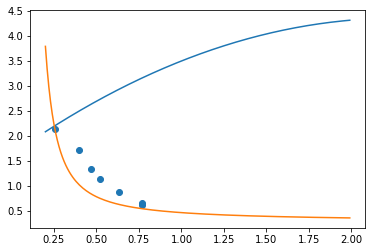

In [49]:
plt.plot(np.arange(0.2, 2.0, 0.01), [volkmer_vol(i) for i in np.arange(0.2, 2.0, 0.01)])
plt.scatter([np.log(2.0)/i for i in gr_h], v)
plt.plot(np.arange(0.2, 2.0, 0.01), [sta_vol(i) for i in np.arange(0.2, 2.0, 0.01)])
plt.show()

In [50]:
dt_min = 93.47444915771484
dt_h = dt_min/60.0
gr_h = np.log(2.0)/dt_h

In [51]:
gr_h

0.44492191404547277

In [52]:
sta_vol(gr_h)

0.8856014853459089

In [37]:
############################################################
################ optimise Volkmer et al. gr to fL ##########
############################################################

In [164]:
gr_h = [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.6, 0.67, 0.39, 0.47, 0.4, 0.49, 0.55, 0.65, 0.5, 0.65, 0.5, 0.35, 0.2, 0.12, 0.0, 0.0]
cell_v = [4.4, 3.9, 4.0, 4.1, 3.9, 2.4, 2.4, 1.9, 3.2, 3.0, 2.9, 2.3, 2.1, 2.4, 2.9, 2.8, 3.1, 2.8, 2.6, 2.4, 2.2, 2.1, 2.5, 1.6]

In [388]:
gr_h =        [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.60, 0.67, 0.39, 0.47, 0.40, 0.49, 0.55, 0.65, 0.50, 0.65, 0.5, 0.35, 0.2, 0.12, 0.0, 0.0]
gr_h_uncert = [0.05, 0.04, 0.05, 0.07, 0.04, 0.02, 0.03, 0.02, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.01, 0.02, 0.11, 0.02, 0.0, 0.00, 0.0, 0.00, 0.0, 0.0]
cell_v =        [4.4, 3.9, 4.0, 4.1, 3.9, 2.4, 2.4, 1.9, 3.2, 3.0, 2.9, 2.3, 2.1, 2.4, 2.9, 2.8, 3.1, 2.8, 2.6, 2.4, 2.2, 2.1, 1.5, 1.6]
cell_v_uncert = [1.1, 1.2, 1.3, 1.2, 1.2, 1.3, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.2, 1.2, 1.3, 1.2, 1.9, 1.7, 1.8, 1.9, 1.2, 1.1]

In [389]:
print(len(gr_h))
print(len(gr_h_uncert))
print(len(cell_v))
print(len(cell_v_uncert))

24
24
24
24


In [390]:
dt_min = [(np.log(2.0)/i)*60.0 for i in gr_h]
dt_min[-1] = 1000.0
dt_min[-2] = 1000.0

/Users/melchior/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in double_scalars



In [410]:
dt_h = [np.log(2)/i for i in gr_h]

/Users/melchior/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in double_scalars



In [411]:
dt_min = [i*60.0 for i in dt_h]

In [412]:
#gr_min = [np.log(2.0)/i for i in dt_min]
gr_min = [np.log(2)/i for i in dt_min]

In [403]:
def f(x, p1, p2, p3): 
    return p1*np.exp(p2*x)+p3

In [404]:
#sigma --> uncertainty
#kwargs
#maxfev = 1000000,
#method='lm',
#xtol=0.0000000000000000001
params, params_covariance = optimize.curve_fit(f, dt_min, cell_v,
                                               p0=[3.72029076, -0.02197174,  1.0],
                                              sigma=cell_v_uncert)

In [428]:
def f(x, p1, p2, p3): 
    #if p1*np.exp(p2*)+1.2
    return p1*np.exp(p2*(np.log(2)/x))+p3
    #return p1*(x**2.0)+p2*x+p3

In [456]:
def f(x, p1, p2, p3): 
    #if p1*np.exp(p2*)+1.2
    return p1*np.exp(p2*(np.log(2)/x))+1.6
    #return p1*(x**2.0)+p2*x+p3

In [457]:
params, params_covariance = optimize.curve_fit(f, gr_min, cell_v,
                                               p0=[3.72029076, -0.02197174, 1.6],
                                              sigma=cell_v_uncert)

/Users/melchior/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



In [458]:
#gr_h --> array([-0.38951254,  1.95139596,  2.26378015])
params

array([ 3.68127319, -0.01447239,  1.6       ])

In [452]:
#1.2 ==> array([ 3.74555869, -0.01048622,  1.2       ])
#1.6 >> array([ 3.68127319, -0.01447239,  1.6       ])

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [ ]:
params = [ 3.74555869, -0.01048622,  1.6       ]

In [453]:
ori_data = go.Scatter(
    name='Volkmer et al.',
    x=gr_min,
    y=cell_v,
    #error_x=dict(
    #        type='data', # value of error bar given in data coordinates
    #        array=[(np.log(2)/i)*60.0 for i in gr_h_std],
    #        #array=gr_h_std,
    #        visible=True),
    error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=cell_v_uncert,
            visible=True),
    mode='markers',
    marker=dict(color='rgb(0,0,0,0)')
    )

#params = [ 3.68034823, -0.01648702,  1.75225902]

fit_data = go.Scatter(
    name='Fit',
    x=np.arange(0.00001, 0.0275, 0.0001),
    #y=[f(i, params[0], params[1], params[2]) for i in np.arange(10.0, 1000.0, 1.0)],
    y=[f(i, params[0], params[1], params[2]) for i in np.arange(0.00001, 0.0275, 0.0001)],
    mode='lines',
    line=dict(color='#d62728',
             dash='dash'
            )
    )

data = []
data.append(ori_data)
data.append(fit_data)

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Volume (fL)'),
    title='Fit Volkmer et al.',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [459]:
def f(x, p1, p2, p3): 
    #if p1*np.exp(p2*)+1.2
    return p1*np.exp(p2*x)+p3
    #return p1*(x**2.0)+p2*x+p3

In [460]:
ori_data = go.Scatter(
    name='Volkmer et al.',
    x=dt_min,
    y=cell_v,
    #error_x=dict(
    #        type='data', # value of error bar given in data coordinates
    #        array=[(np.log(2)/i)*60.0 for i in gr_h_std],
    #        #array=gr_h_std,
    #        visible=True),
    error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=cell_v_uncert,
            visible=True),
    mode='markers',
    marker=dict(color='rgb(0,0,0,0)')
    )

#params = [ 3.68034823, -0.01648702,  1.75225902]

fit_data = go.Scatter(
    name='Fit',
    x=np.arange(0.00001, 350.0, 1.0),
    #y=[f(i, params[0], params[1], params[2]) for i in np.arange(10.0, 1000.0, 1.0)],
    y=[f(i, params[0], params[1], params[2]) for i in np.arange(0.00001, 350.0, 1.0)],
    mode='lines',
    line=dict(color='#d62728',
             dash='dash'
            )
    )

data = []
data.append(ori_data)
data.append(fit_data)

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Volume (fL)'),
    title='Fit Volkmer et al.',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [424]:
###################################################
############ Use optimised Volume where tau=C+D ###
###################################################

In [382]:
params

[3.68034823, -0.01648702, 1.75225902]

In [381]:
#calculate when 
dt_min = 93.47458759450846
gr_min = np.log(2)/gr_min
dt_h = dt_min/60.0
gr_h = np.log(2)/dt_h
print(gr_h)
#original Volkmer et al.
#measured_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
#fit data from Volkmer et al.
#p = [ 3.68034821, -0.01648702,  1.75225901]
measured_volume = params[0]*np.exp(params[1]*dt_min)+params[2]
print('Minimization (when C+D==tau) returned a doubling time of: '+str(dt_min))
print('Measured volume when C+D==tau: '+str(measured_volume))

0.4449212551116943
Minimization (when C+D==tau) returned a doubling time of: 93.47458759450846
Measured volume when C+D==tau: 2.5403749980079233


In [325]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [326]:
age_array = np.arange(0.0, 1.0, 0.0001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.0001)[0]

In [461]:
# another volume 2.5873453927627095 0.8856014853459089   2.5873441154965957 
def popCellCount(dt_min, age_array, weights, real_cell_volume=2.1):
    ##### dt_min ####
    dt_min = dt_min
    gr_min = np.log(2)/dt_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h
    ##### gr_min #####
    #dt_min = np.log(2.0)/gr_min
    #gr_min = gr_min
    #dt_h = dt_min/60.0
    #gr_h = np.log(2)/dt_h   
    D = 62.8298142*np.exp(-213.585678*gr_min)+25.5633968
    C = 235.796165*np.exp(-428.916673*gr_min)+45.2188479
    #C = 250.02*np.exp(-304.41*gr_min)+60.97
    #D = 100.59*np.exp(-137.07*gr_min)+19.93
    #C = 40.0
    #D = 20.0
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        for y in range(int(weights[i]*100000.0)):
            physical_volume.append(results[0]*real_cell_volume)
            Ga.append(results[2])
    return {'cell_concentration': (3.6*10.0**9.0)/np.mean(physical_volume),
            'std_cell_concentration': np.std([(3.6*10.0**9.0)/i for i in physical_volume]),
            'mean_physical_volume': np.mean(physical_volume),
            'std_physical_volume': np.std(physical_volume),
            #'physical_volume': physical_volume,
            'mean_Ga': np.mean(Ga),
            'std_Ga': np.std(Ga)}
            #'Ga': Ga}

In [462]:
dt_min = np.arange(20.0, 250.0, 1.0)
results = []
for i in dt_min:
    results.append(onlyVolkmer(i)) 
    
trace = go.Scatter(
    name='Volkmer et al.',
    x=dt_min,
    y=results,
    mode='lines',
    line=dict(color='#2ca02c',
             dash='dash'
            )
)

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration ', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Volume',
    showlegend = False,
    template='plotly_white'
)


results = []
for i in dt_min:
    #results.append(popCellCount(i, age_array, weights)) 
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty',
    showlegend=False
)

trace = go.Scatter(
    name='Cooper and Helmstetter',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')


trace2 = go.Scatter(
    name='Fixed Cell Concentration',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='#d62728',
             dash='dash'
            )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines',
    showlegend=False
)

# Trace order can be important
# with continuous error bars
data.append(lower_bound)
data.append(trace)
data.append(upper_bound)
#data.append(trace1)
data.append(trace2)

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = True,
    template='plotly_white'
)

"""
gr_h = [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.6, 0.67, 0.39, 0.47, 0.4, 0.49, 0.55, 0.65, 0.5, 0.65, 0.5, 0.35, 0.2, 0.12, 0.0, 0.0]
gr_h_std = [0.05, 0.04, 0.05, 0.07, 0.04, 0.02, 0.03, 0.02, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.01, 0.02, 0.11, 0.02, 0.0, 0.0, 0.0,]
cell_count = [7.8, 7.5, 5.9, 6.3, 8.2, 16.8, 17.0, 19.9, 11.1, 1.1, 11.0, 12.2, 19.6, 21.0, 16.7, 10.4, 11.3, 10.5, 11.0, 13.4, 19.7, 20.6, 23.0, 21.9, 22.9]
cell_std = [0.8, 0.8, 0.6, 0.6, 0.8, 1.7, 1.7, 2.0, 1.1, 1.1, 1.2, 2.0, 2.1, 1.7, 1.0, 1.1, 1.1, 1.1, 1.3, 2.0, 2.1, 2.3, 2.2, 2.3]


print(len(gr_h))
print(len(gr_h_std))
print(len(cell_count))
print(len(cell_std))
"""

gr_h = [1.61, 1.62, 1.49, 1.28, 1.26, 0.29, 0.47, 0.17, 0.6, 0.67, 0.39, 0.47, 0.4, 0.49, 0.55, 0.65, 0.5, 0.65, 0.5, 0.35, 0.2]
gr_h_std = [0.05, 0.04, 0.05, 0.07, 0.04, 0.02, 0.03, 0.02, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.01, 0.02, 0.11, 0.02, 0.0, 0.0, 0.0]
cell_count = [7.8, 7.5, 5.9, 6.3, 8.2, 16.8, 17.0, 19.9, 11.1, 11.0, 12.2, 19.6, 21.0, 16.7, 10.4, 11.3, 10.5, 11.0, 13.4, 19.7, 20.6]
cell_std = [0.8, 0.8, 0.6, 0.6, 0.8, 1.7, 1.7, 2.0, 1.1, 1.1, 1.2, 2.0, 2.1, 1.7, 1.0, 1.1, 1.1, 1.1, 1.3, 2.0, 2.1]


trace_meas = go.Scatter(
    name='Volkmer et al.',
    x=[(np.log(2)/i)*60.0 for i in gr_h],
    #x=[i*60.0 for i in gr_h],
    y=[i*10.0**8.0 for i in cell_count],
    #error_x=dict(
    #        type='data', # value of error bar given in data coordinates
    #        array=[(np.log(2)/i)*60.0 for i in gr_h_std],
    #        #array=gr_h_std,
    #        visible=True),
    error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=[i*10.0**8.0 for i in cell_std],
            visible=True),
    mode='markers',
    marker=dict(color='rgb(0,0,0,0)')
    )

data.append(trace_meas)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """

"""
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=78,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="(58.05, 0.8x10<sup>9</sup>)",
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)
"""

fig.update_layout(
    legend=go.layout.Legend(
        x=0.015,
        y=0.95
    )
)

iplot(fig, filename='pandas-continuous-error-bars')